1. Gerekli Kütüphaneler


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

2. Veriyi dahil etme

In [10]:
data = pd.read_csv("imdb_raw.csv")
df_imdb = pd.DataFrame(data)

In [22]:
df_imdb.head(10)

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,(1994),142 min,Drama,9.3,82,$28.34M
1,The Godfather,Francis Ford Coppola,(1972),175 min,"Crime, Drama",9.2,100,$134.97M
2,The Dark Knight,Christopher Nolan,(2008),152 min,"Action, Crime, Drama",9.0,84,$534.86M
3,Schindler's List,Steven Spielberg,(1993),195 min,"Biography, Drama, History",9.0,95,$96.90M
4,12 Angry Men,Sidney Lumet,(1957),96 min,"Crime, Drama",9.0,97,$4.36M
5,The Lord of the Rings: The Return of the King,Peter Jackson,(2003),201 min,"Action, Adventure, Drama",9.0,94,$377.85M
6,The Godfather Part II,Francis Ford Coppola,(1974),202 min,"Crime, Drama",9.0,90,$57.30M
7,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,(2023),140 min,"Animation, Action, Adventure",8.9,86,0
8,Pulp Fiction,Quentin Tarantino,(1994),154 min,"Crime, Drama",8.9,95,$107.93M
9,Inception,Christopher Nolan,(2010),148 min,"Action, Adventure, Sci-Fi",8.8,74,$292.58M


3. Veri temizleme


Aykırı Değerler

In [12]:
for i in list(df_imdb.columns):
    print(f"{i} -> {df_imdb[i].value_counts().shape[0]}")

title -> 994
director -> 560
release_year -> 123
runtime -> 142
genre -> 195
rating -> 17
metascore -> 61
gross -> 709


Null değerler

In [15]:
df_imdb.isnull().sum()

title           0
director        0
release_year    0
runtime         0
genre           0
rating          0
metascore       0
gross           0
dtype: int64

4. Keşifsel veri analizi

Temel İstatistiksel özet


In [16]:
df_imdb.head(10)

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,(1994),142 min,Drama,9.3,82,$28.34M
1,The Godfather,Francis Ford Coppola,(1972),175 min,"Crime, Drama",9.2,100,$134.97M
2,The Dark Knight,Christopher Nolan,(2008),152 min,"Action, Crime, Drama",9.0,84,$534.86M
3,Schindler's List,Steven Spielberg,(1993),195 min,"Biography, Drama, History",9.0,95,$96.90M
4,12 Angry Men,Sidney Lumet,(1957),96 min,"Crime, Drama",9.0,97,$4.36M
5,The Lord of the Rings: The Return of the King,Peter Jackson,(2003),201 min,"Action, Adventure, Drama",9.0,94,$377.85M
6,The Godfather Part II,Francis Ford Coppola,(1974),202 min,"Crime, Drama",9.0,90,$57.30M
7,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,(2023),140 min,"Animation, Action, Adventure",8.9,86,0
8,Pulp Fiction,Quentin Tarantino,(1994),154 min,"Crime, Drama",8.9,95,$107.93M
9,Inception,Christopher Nolan,(2010),148 min,"Action, Adventure, Sci-Fi",8.8,74,$292.58M


In [19]:
df_imdb.dtypes

title            object
director         object
release_year     object
runtime          object
genre            object
rating          float64
metascore         int64
gross            object
dtype: object

In [20]:
df_imdb.describe()

,rating,metascore
count,1000.00000,1000.000000
mean,7.96870,66.653000
std,0.27562,30.712829
min,7.60000,0.000000
25%,7.80000,64.750000
50%,7.90000,77.000000
75%,8.10000,86.000000
max,9.30000,100.000000


Ortalama, medyan

In [21]:
df_imdb.mean

<bound method DataFrame.mean of                         title              director release_year  runtime  \
0    The Shawshank Redemption        Frank Darabont       (1994)  142 min   
1               The Godfather  Francis Ford Coppola       (1972)  175 min   
2             The Dark Knight     Christopher Nolan       (2008)  152 min   
3            Schindler's List      Steven Spielberg       (1993)  195 min   
4                12 Angry Men          Sidney Lumet       (1957)   96 min   
..                        ...                   ...          ...      ...   
995    A Very Long Engagement    Jean-Pierre Jeunet       (2004)  133 min   
996                     Shine           Scott Hicks       (1996)  105 min   
997                 Philomena        Stephen Frears       (2013)   98 min   
998         The Invisible Man           James Whale       (1933)   71 min   
999                  Cell 211         Daniel Monzón       (2009)  113 min   

                         genre  rating  met

5. Standartlaştırma ve boyut indirgeme

Standartization

Normalization

6. Veri görselleştirme

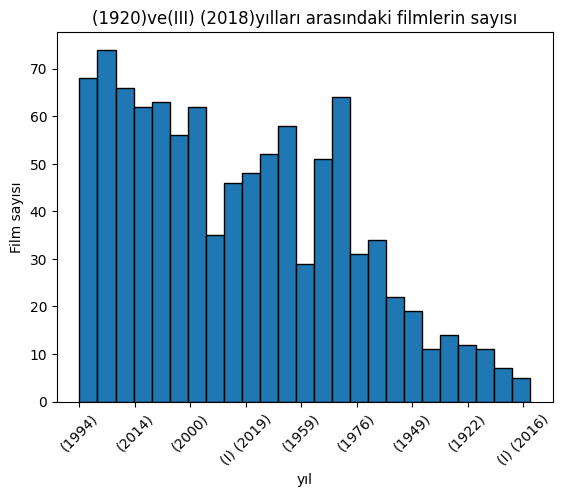

In [30]:
plt.hist(df_imdb["release_year"], bins = 25, edgecolor = "black"  )
plt.xlabel("yıl")
plt.ylabel("Film sayısı")
plt.title(str(df_imdb["release_year"].min()) + "ve" + str(df_imdb["release_year"].max()) + "yılları arasındaki filmlerin sayısı"    )

plt.xticks(rotation = 45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

- Filmler en çok 1994 ve 2014 yılında çekilmiştir.
- Diğer taraftan 1922 ve 1976 yılları arasında diğer yıllara nazaran daha az film çekilmiştir.

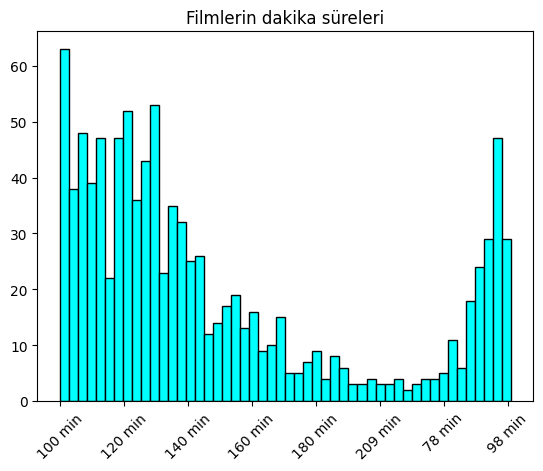

In [38]:
df_sorted = df_imdb.sort_values(by="runtime")

plt.title("Filmlerin dakika süreleri")
plt.hist(df_sorted["runtime"], bins = 50, edgecolor = "black", color= "cyan"  )
plt.xticks(rotation = 45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

* 160 dakikanın üstündeki filmler, diğerlerine göre daha az miktarda var 

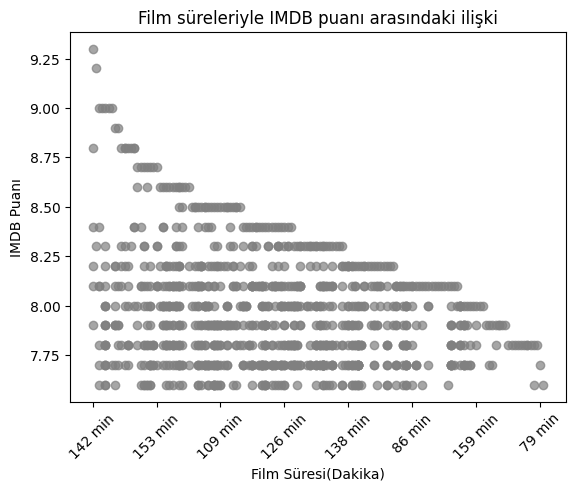

In [39]:
plt.scatter(df_imdb["runtime"], df_imdb["rating"], color="gray", alpha=.7)
plt.title("Film süreleriyle IMDB puanı arasındaki ilişki")
plt.xlabel("Film Süresi(Dakika)")
plt.ylabel("IMDB Puanı")



plt.xticks(rotation = 45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

* Yüksek puanlı filmler genellikle 110 - 150 dakika arasındaki uzunluğa sahip filmlerden oluşuyor
* Çok uzun ve kısa filmler genelde 8 puan altında kalıyor

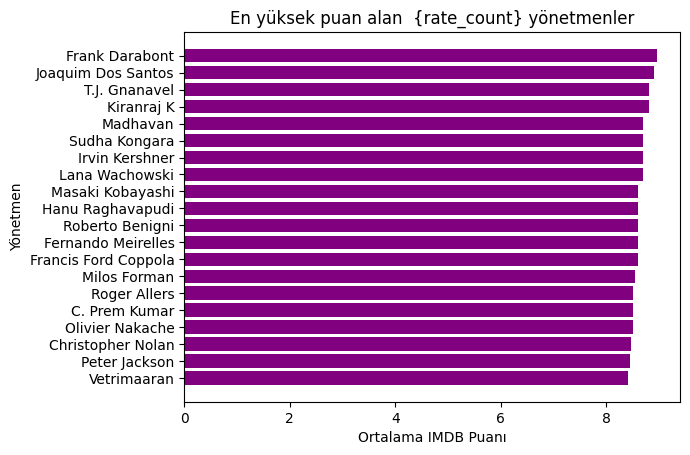

In [45]:
rate_count = 20

director_rate = df_imdb.groupby("director")["rating"].mean().sort_values(ascending=False).head(rate_count)
plt.barh(director_rate.index, director_rate.values, color = "purple")
plt.title("En yüksek puan alan  {rate_count} yönetmenler")

plt.xlabel('Ortalama IMDB Puanı')
plt.ylabel('Yönetmen')

plt.gca().invert_yaxis()

* En yüksek puan alan yönetmenler genellikle yakın puanlara sahip

Text(0.5, 1.0, 'En çok filme sahip olan 10 yönetmen')

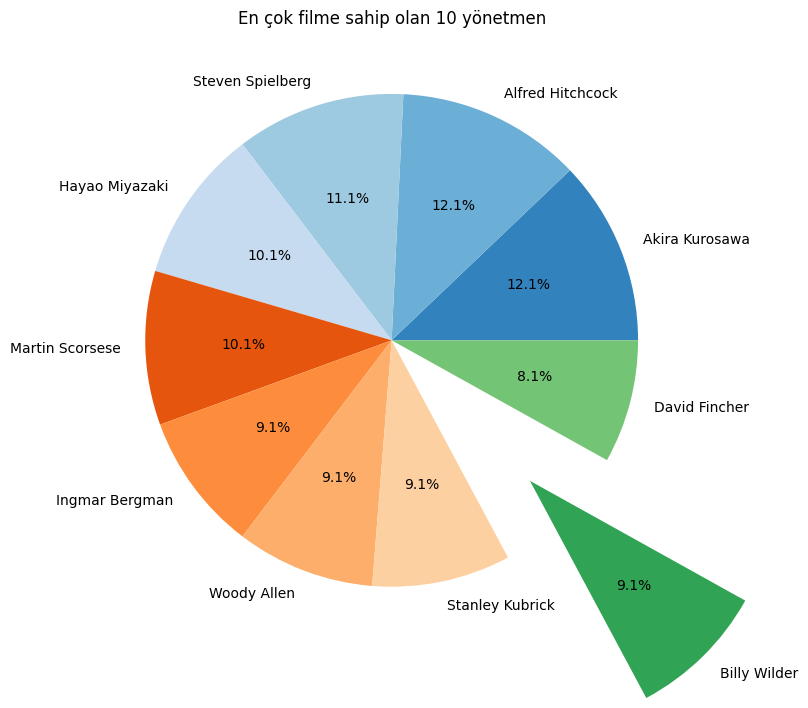

In [53]:
director_count = df_imdb["director"].str.split(",",expand=True).stack().value_counts().head(10)
explode = [0,0,0,0,0,0,0,0,0.8,0]

plt.figure(figsize=(10,8))
plt.pie(director_count, labels=director_count.index, autopct="%1.1f%%", colors=plt.cm.tab20c.colors,explode=explode)

plt.title("En çok filme sahip olan 10 yönetmen")